In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os


    # --- 1. 데이터 불러오기 ----------------------------------------------------
map_df      = pd.read_csv("area_map.csv")
struct_df   = pd.read_csv("area_struct.csv")
category_df = pd.read_csv("area_category.csv")

   # 열 이름 공백 제거
category_df.columns = category_df.columns.str.strip()
category_df['struct'] = category_df['struct'].str.strip()
category_df.to_csv('category_df.csv', index=False)
# category=0,None이 없으면 추가
if not (category_df['category'] == 0).any():
    category_df = pd.concat([
        pd.DataFrame({'category': [0], 'struct': ['None']}),
        category_df
    ], ignore_index=True)


In [17]:
# --- 2. 병합 (좌표 기준 → 구조물 번호 → 이름) ------------------------------
merged = (
    map_df
    .merge(struct_df, on=["x", "y"], how="left")
    .merge(category_df, on="category", how="left")
)
merged["struct"] = merged["struct"].fillna("None")
merged.to_csv('merged.csv', index=False)
merged

,x,y,ConstructionSite,category,area,struct
0,1,1,0,0,0,None
1,1,2,0,0,0,None
2,1,3,0,0,0,None
3,1,4,0,2,0,Building
4,1,5,0,0,0,None
...,...,...,...,...,...,...
220,15,11,0,0,3,None
221,15,12,0,0,3,None
222,15,13,0,0,3,None
223,15,14,0,0,3,None


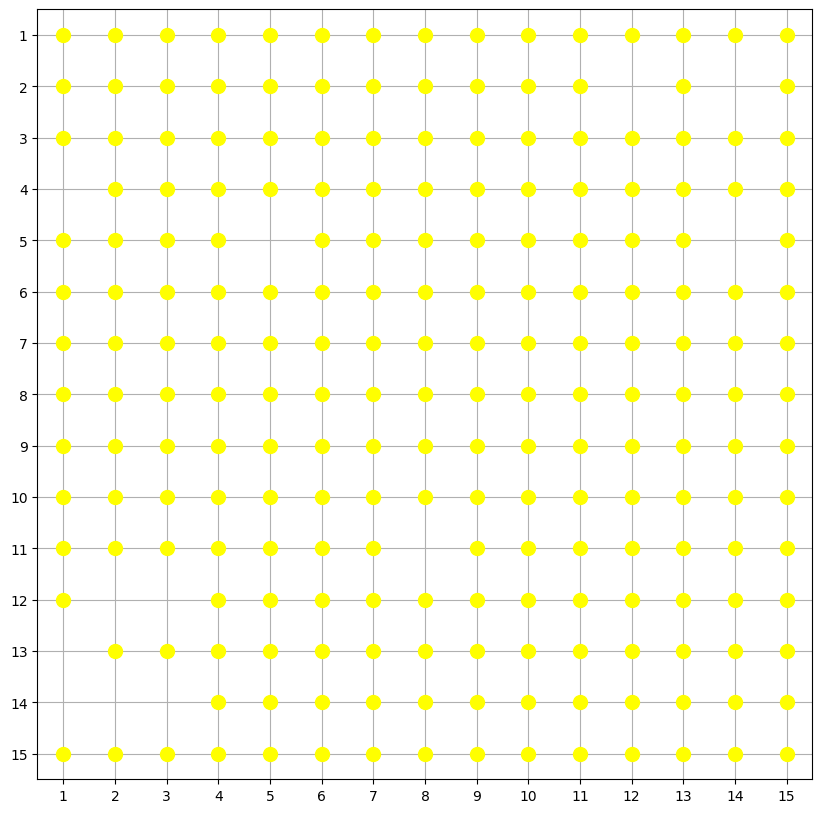

In [15]:
# --- 3. 시각화 초기 설정 ---------------------------------------------------
max_x, max_y = merged["x"].max(), merged["y"].max()
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(0.5, max_x + 0.5)
ax.set_ylim(0.5, max_y + 0.5)
ax.set_xticks(np.arange(1, max_x + 1))
ax.set_yticks(np.arange(1, max_y + 1))
ax.grid(True)
ax.invert_yaxis()  # (1,1)이 좌측 상단
# --- 4. 구조물 먼저 그리기 (건설현장 위에 올라오게) -------------------------
for _, r in merged.iterrows():
    if r["struct"] == "None":        
        ax.plot(r["x"], r["y"], "o", color="yellow", markersize=10)
    elif r["struct"] in ("Apartment", "Building"):
        ax.plot(r["x"], r["y"], "o", color="brown", markersize=10)
    elif r["struct"] == "BandalgomCoffee":
        ax.plot(r["x"], r["y"], "s", color="green", markersize=10)
    elif r["struct"] == "MyHome":
        ax.plot(r["x"], r["y"], "^", color="green", markersize=10)